In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
# loading our dataframes
#we will be using df_m for our sample of math class studetns and df_p for our sameple of portugees class. 

df_m = pd.read_csv('../data/student-mat.csv', delimiter=';')
df_p = pd.read_csv('../data/student-por.csv', delimiter=';')

In [4]:
#Let's figure out what do we have in our dataframes 

#First let's see what is the shappe of each dataframe 

print("Math Class:", df_m.shape)
print("Portugees class:", df_p.shape)

Math Class: (395, 33)
Portugees class: (649, 33)


In [5]:
#how we can see we have more students rows in one of our classes
#let's see if we have the same type of columns since their cuanitiy is simlar 

print("Columns of Math Class:", df_m.columns)
print("Columns of Port Class:", df_m.columns)

Columns of Math Class: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
Columns of Port Class: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [6]:
#Since we can confirm that we have identical columns, let's see if we are missing any data 
df_m.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [7]:

df_p.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
#good news! no data is missing, let's try to get our basic stat info from dataframes 
print("Math Class:", df_m.describe()) 

print("Port Class:", df_p.describe())

Math Class:               age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.8966

In [9]:
#since our thesis is "Compare romantic relationships in correlation to student performance."
#first we need to figure out how many studetns in relatiosnhip in each class and what is their current status 

print("Relationship status of Math class sutdetns:", df_m.value_counts("romantic"))

print("         ")

print("Relationship status of Port. class sutdetns:", df_p.value_counts("romantic"))

Relationship status of Math class sutdetns: romantic
no     263
yes    132
Name: count, dtype: int64
         
Relationship status of Port. class sutdetns: romantic
no     410
yes    239
Name: count, dtype: int64


Text(0.5, 1.0, 'Histogram representation of relationship status in Math class')

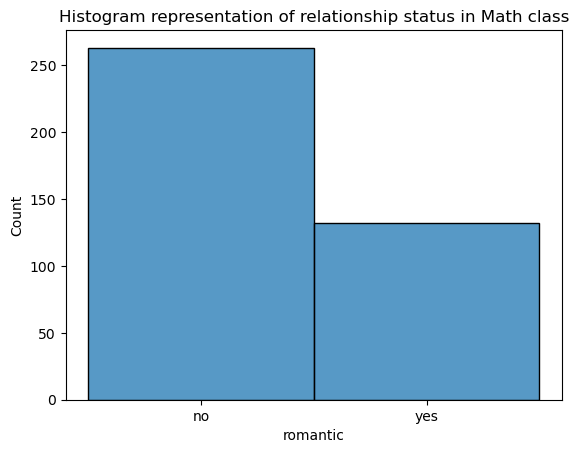

In [10]:
#let's visualize how many students in math class are single or taken
sns.histplot(data = df_m, x = "romantic") 
plt.title('Histogram representation of relationship status in Math class')

Text(0.5, 1.0, 'Histogram representation of relationship status in Port class')

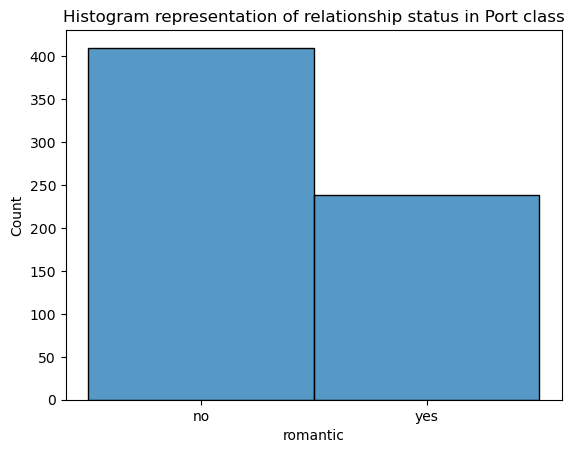

In [11]:
#let's visualize how many students in Port class are single or taken
sns.histplot(data = df_p, x = "romantic") 
plt.title('Histogram representation of relationship status in Port class')

Sex differences in Math Class: sex
F    208
M    187
Name: count, dtype: int64


Text(0.5, 1.0, 'Histogram representation of sex identity in Math class')

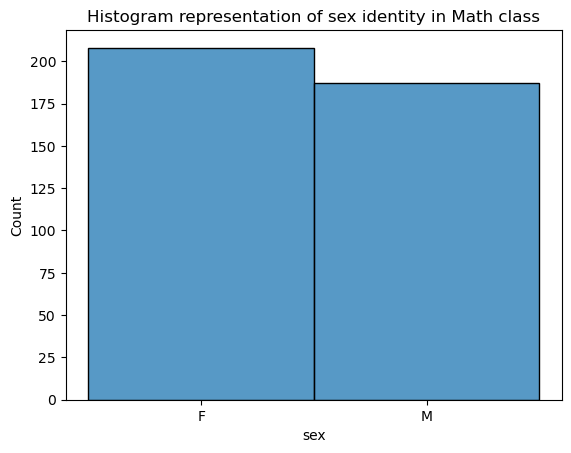

In [12]:
#now let's see the breakdown of gender differences in each classes 

print("Sex differences in Math Class:", df_m.value_counts("sex"))
sns.histplot(data = df_m, x = "sex") 
plt.title('Histogram representation of sex identity in Math class')

Sex differences in Port Class: sex
F    383
M    266
Name: count, dtype: int64


Text(0.5, 1.0, 'Histogram representation of sex identity in Port class')

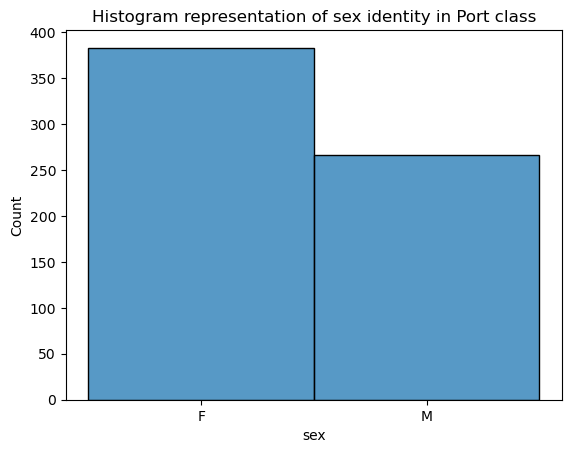

In [13]:

print("Sex differences in Port Class:", df_p.value_counts("sex"))
sns.histplot(data = df_p, x = "sex") 
plt.title('Histogram representation of sex identity in Port class')

In [14]:
#let's sort our variables based on gender and relathionship status 
#first we need to create new section just with our variables 

romance_sex_m = df_m.groupby(['sex', 'romantic']).size()
romance_sex_p = df_p.groupby(['sex', 'romantic']).size()
print("Sex of students and their relationsip status for Math class:", romance_sex_m)
print("   ")
print("Sex of students and their relationsip status for Port class:", romance_sex_p)

Sex of students and their relationsip status for Math class: sex  romantic
F    no          129
     yes          79
M    no          134
     yes          53
dtype: int64
   
Sex of students and their relationsip status for Port class: sex  romantic
F    no          225
     yes         158
M    no          185
     yes          81
dtype: int64


<Axes: xlabel='G3', ylabel='Count'>

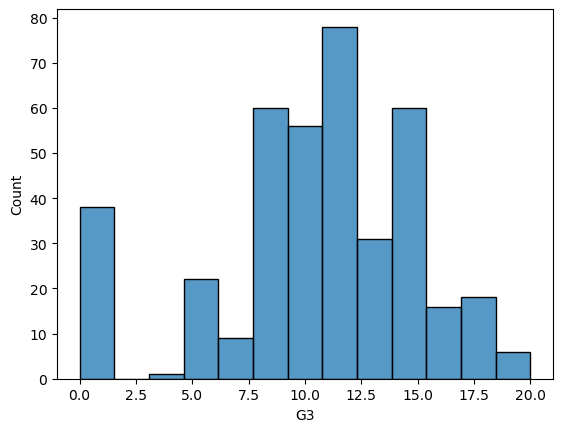

In [15]:
#visual observation of the final grades 
sns.histplot(df_m['G3'])

<Axes: xlabel='G3', ylabel='Count'>

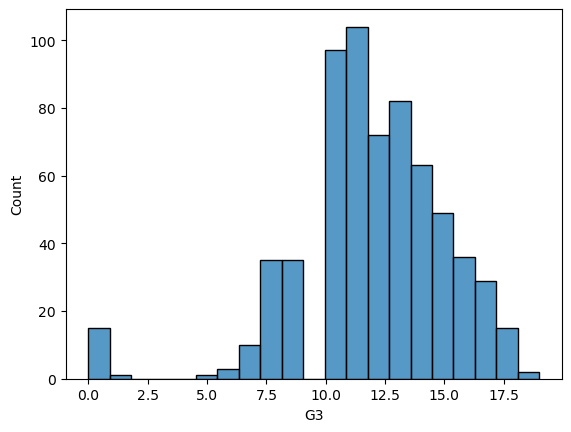

In [16]:
sns.histplot(df_p["G3"])

In [17]:
#how we can obseve, looks like some of our studetn are reciveing final grade lower than 5 out of 20 points possible. 
#they might be outliners 

Boxplot visualization of Math Class studdetns: Axes(0.125,0.11;0.775x0.77)


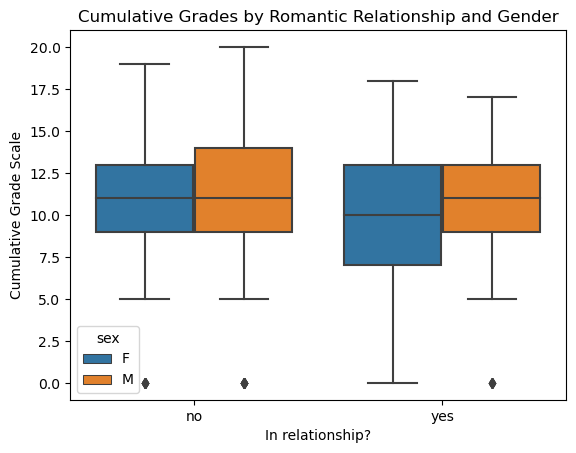

In [18]:
#let's get visualization on relationship between our numerical varaible (Cumulative grades scale) and categorical variables (Sex identity and Reltationship status)
boxplot_m = sns.boxplot(data=df_m, x= 'romantic', y='G3', hue='sex')
plt.xlabel('In relationship?')
plt.ylabel('Cumulative Grade Scale')
plt.title('Cumulative Grades by Romantic Relationship and Gender')
print("Boxplot visualization of Math Class studdetns:", boxplot_m)

Boxplot visualization of Port Class studdetns: Axes(0.125,0.11;0.775x0.77)


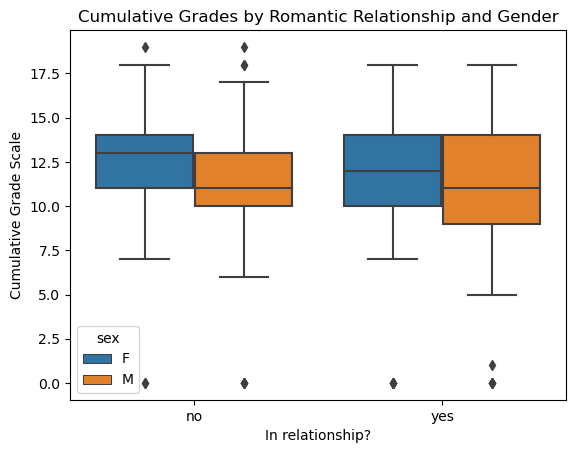

In [19]:
boxplot_p = sns.boxplot(data=df_p, x= 'romantic', y="G3", hue='sex')
plt.xlabel('In relationship?')
plt.ylabel('Cumulative Grade Scale')
plt.title('Cumulative Grades by Romantic Relationship and Gender')
print("Boxplot visualization of Port Class studdetns:", boxplot_p)

# Explore (Mickal)

<Axes: xlabel='school', ylabel='G3'>

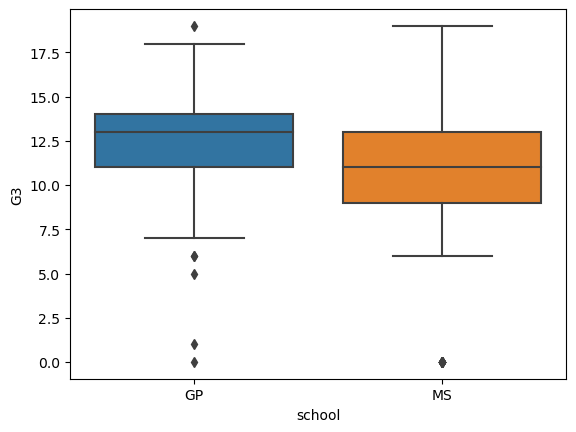

In [26]:
# final Portuguese grade by school 
sns.boxplot(data=df_p, x='school', y='G3')

<Axes: xlabel='school', ylabel='G3'>

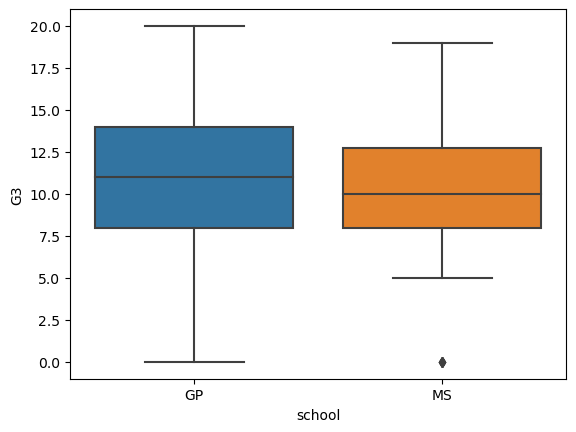

In [27]:
# final Math grade by school 
sns.boxplot(data=df_m, x='school', y='G3')

<Axes: xlabel='internet', ylabel='G3'>

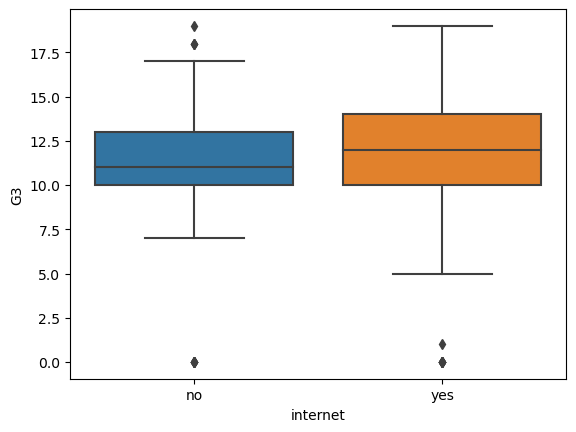

In [55]:
# Final Portuguese grade of students grouped by internet access

# Students with internet access appear to slightly outperform students that lack internet access

sns.boxplot(data=df_p, x='internet', y='G3')

<Axes: xlabel='internet', ylabel='G3'>

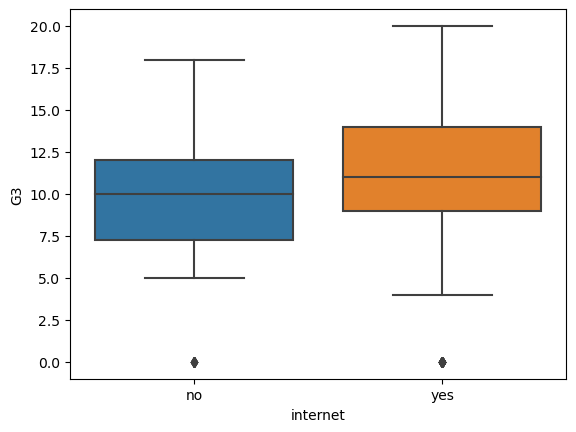

In [54]:
# Final Math grade of students grouped by internet access broken out by school

# Students with internet access appear to slightly outperform students that lack internet access

sns.boxplot(data=df_m, x='internet', y='G3')

<Axes: xlabel='Fjob', ylabel='G3'>

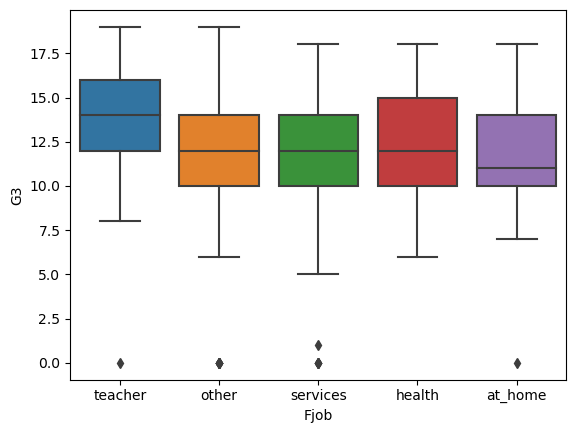

In [49]:
# Final Portuguese grade of students grouped by Father's occupation

# Students whose father's occupation is teacher outperformed 

sns.boxplot(data=df_p, x='Fjob', y='G3')

<Axes: xlabel='Fjob', ylabel='G3'>

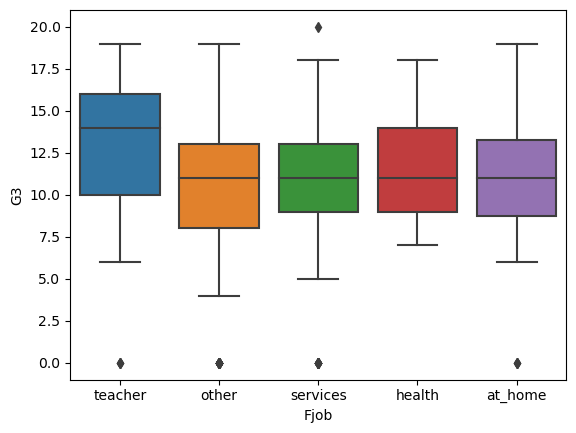

In [48]:
# Final Math grade of students grouped by Father's occupation

# Students whose father's occupation is teacher outperformed 
sns.boxplot(data=df_m, x='Fjob', y='G3')

<Axes: xlabel='higher', ylabel='G3'>

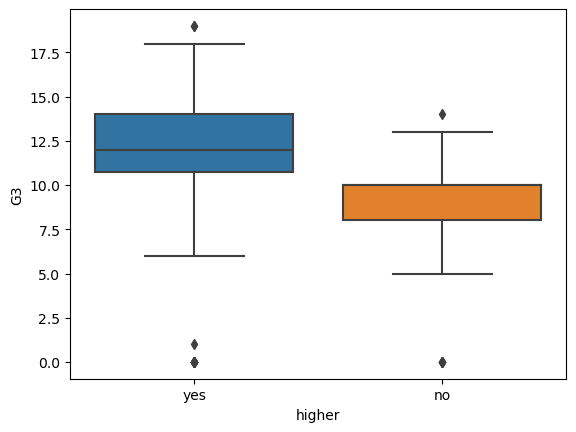

In [47]:
# Final Portuguese grade of students grouped by whether they want to pursue higher education

# Final grades were higher in the group of students that wanted to pursue higher education 
# compared to those that did not want to pursue higher education

sns.boxplot(data=df_p, x="higher", y='G3')

<Axes: xlabel='higher', ylabel='G3'>

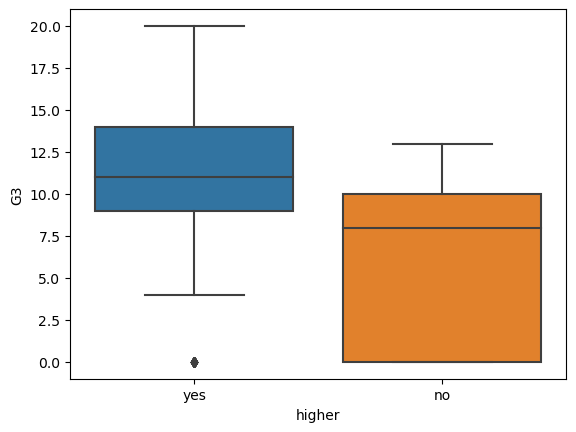

In [46]:
# Final Math grade of students grouped by whether they want to pursue higher education

# Final grades were higher in the group of students that wanted to pursue higher education 
# compared to those that did not want to pursue higher education

sns.boxplot(data=df_m, x="higher", y='G3') 

# EDA (Charles)

<Axes: xlabel='Pstatus', ylabel='G1'>

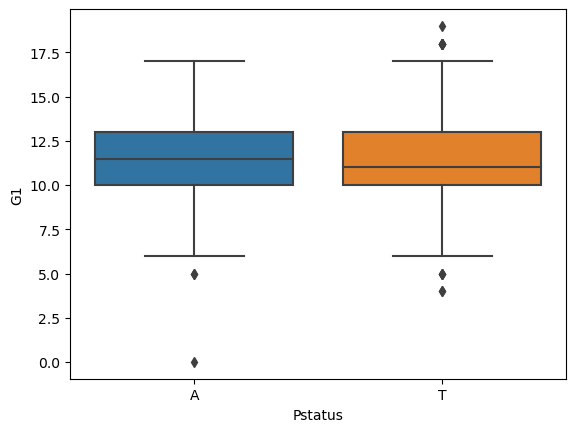

In [3]:
# Box plot showing correlation between grading period one and cohabitation status of the student parents
sns.boxplot(data=df_p, y ='G1', x = 'Pstatus')

<Axes: xlabel='Pstatus', ylabel='G2'>

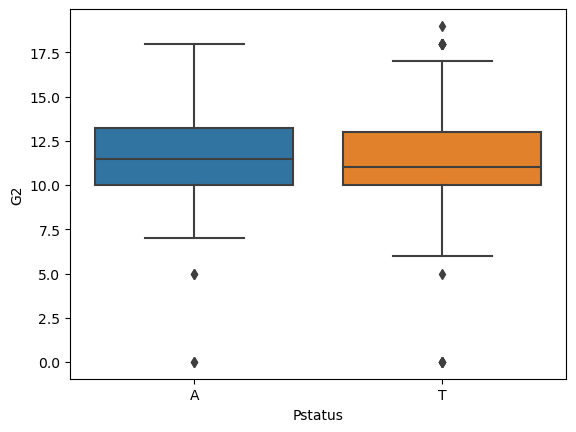

In [4]:
# Box plot showing correlation between grading period two and cohabitation status of the student parents
sns.boxplot(data=df_p, y ='G2', x = 'Pstatus')

<Axes: xlabel='Pstatus', ylabel='G3'>

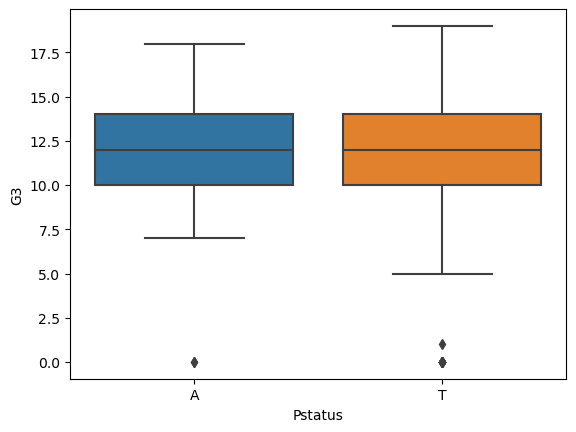

In [5]:
# Box plot showing correlation between grading period three and cohabitation status of the student parents
sns.boxplot(data=df_p, y ='G3', x = 'Pstatus')

<Axes: xlabel='Dalc', ylabel='G1'>

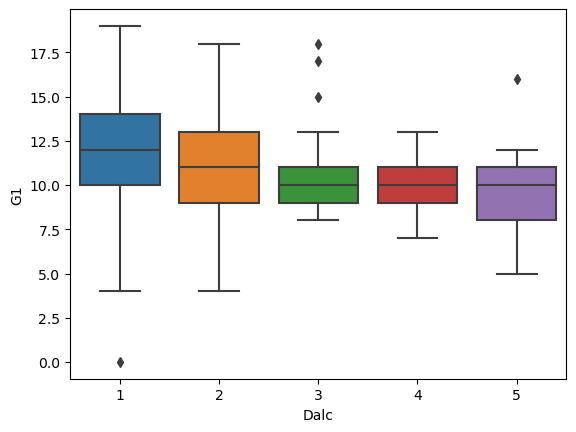

In [6]:
# Box plot showing correlation between grading period one and students drinking alcohol during the week
sns.boxplot(data=df_p, y ='G1', x = 'Dalc')

<Axes: xlabel='Dalc', ylabel='G2'>

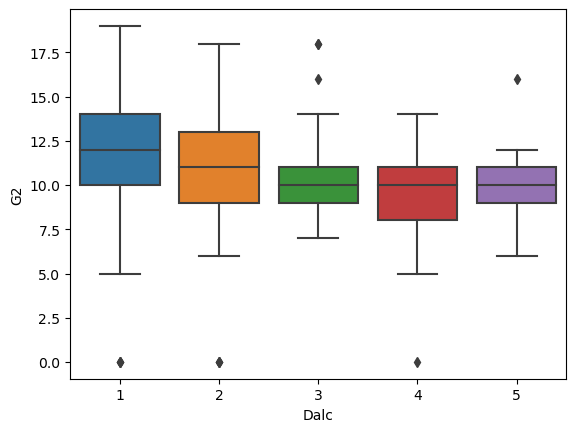

In [7]:
# Box plot showing correlation between grading period two and students drinking alcohol during the week
sns.boxplot(data=df_p, y ='G2', x = 'Dalc')

<Axes: xlabel='Dalc', ylabel='G3'>

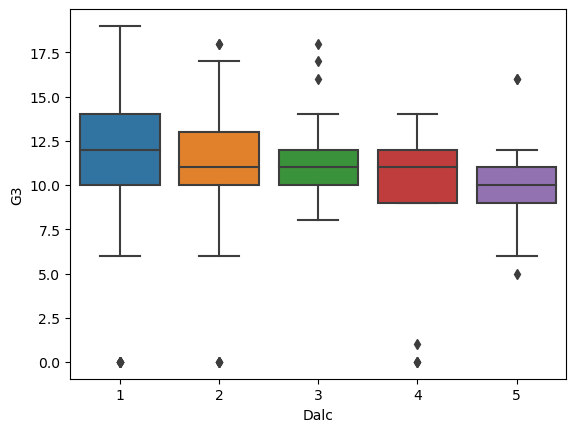

In [8]:
# Box plot showing correlation between grading period three and students drinking alcohol during the week
sns.boxplot(data=df_p, y ='G3', x = 'Dalc')

<Axes: xlabel='Walc', ylabel='G1'>

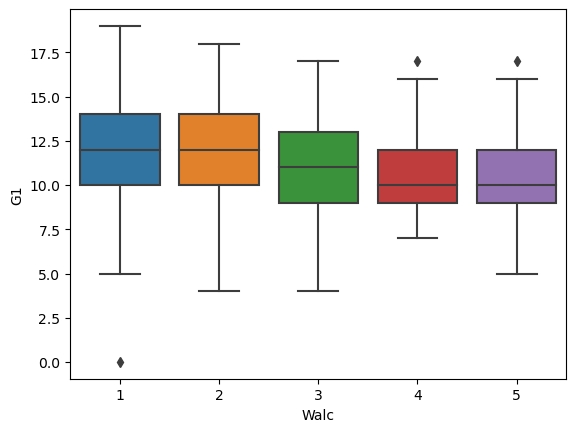

In [9]:
# Box plot showing correlation between grading period one and students drinking alcohol during the weekend
sns.boxplot(data=df_p, y ='G1', x = 'Walc')

<Axes: xlabel='Walc', ylabel='G2'>

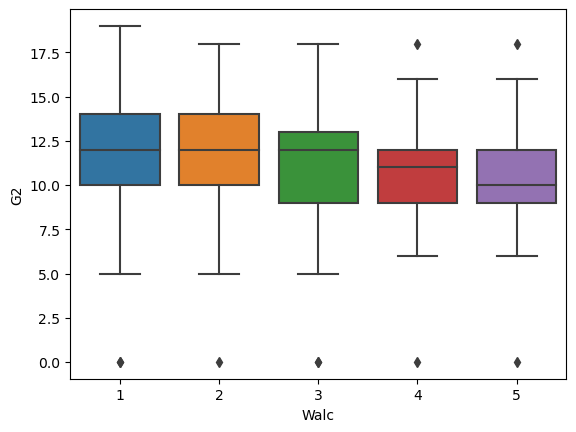

In [11]:
# Box plot showing correlation between grading period two and students drinking alcohol during the weekend
sns.boxplot(data=df_p, y ='G2', x = 'Walc')

<Axes: xlabel='Walc', ylabel='G3'>

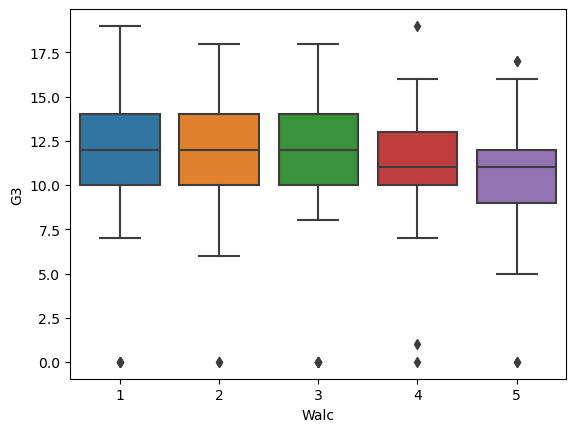

In [12]:
# Box plot showing correlation between grading period three and students drinking alcohol during the weekend
sns.boxplot(data=df_p, y ='G3', x = 'Walc')